## Principal Component Analysis (PCA)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

In [4]:
# Step 1: Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

In [10]:
n_digits = X.shape[0]
X.shape, np.unique(y)

((1797, 64), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

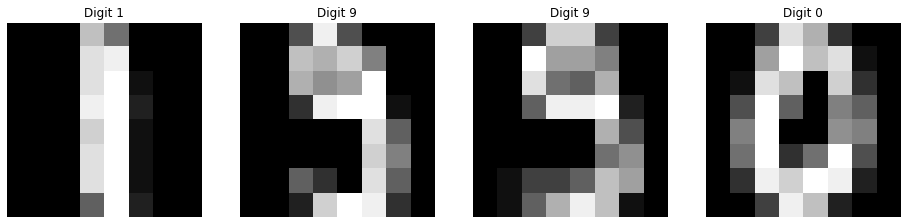

In [18]:
# Step 2: Visualize some digits
fig, axs = plt.subplots(
    1, 4,
    figsize=(16, 8)
)

random_digits = np.random.randint(0, n_digits, 4)

for i, ax in enumerate(axs.flatten()):
    n = random_digits[i]
    ax.imshow(X[n].reshape(8, 8), cmap='gray')
    ax.axis('off')
    ax.set_title(f'Digit {y[n]}')

In [12]:
# Step 3: Perform PCA on the digits dataset
# Keep components explaining 80% of variance
pca = PCA(n_components=0.80)
pca.fit(X)
X_pca = pca.transform(X)

# Step 4: Take the principal components that explain 80% of the variance
n_components = X_pca.shape[1]
print(f'Number of components: {n_components}')

Number of components: 13


### Recontructed digit

Text(0.5, 1.0, 'Reconstructed Digit [4]')

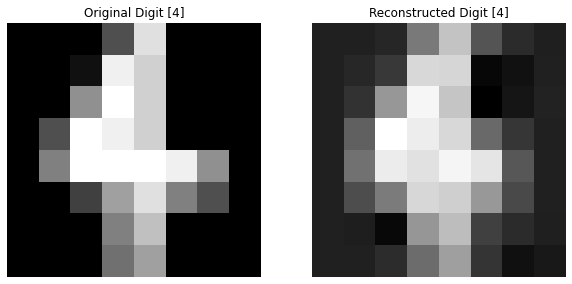

In [15]:
# Step 5: Show a grid of original and reconstructed digits
fig, axs = plt.subplots(
    1, 2,
    figsize=(10, 8)
)

n = np.random.randint(0, n_digits, 1)

# Original digit
axs[0].imshow(X[n].reshape(8, 8), cmap='gray')
axs[0].axis('off')
axs[0].set_title(f'Original Digit {y[n]}')

# Reconstructed digit using PCA components

digit_reconstructed = pca.inverse_transform(X_pca[n])

axs[1].imshow(digit_reconstructed.reshape(8, 8), cmap='gray')
axs[1].axis('off')
axs[1].set_title(f'Reconstructed Digit {y[n]}')

### Visualization